<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/PROJ03_FinancialMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recursos/Vase_004 - Magalu - Tab_Dados.csv')

observando dados

In [38]:
df.sample(15)

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
245,2021-12-29,6.90,6.70,6.84,6.76,79.247.400,6.76
140,2021-07-28,21.78,21.22,21.59,21.53,17.736.600,21.53
36,2021-02-26,24.96,23.98,24.08,24.18,45.690.100,24.16
205,2021-10-29,11.36,10.73,11.24,10.81,41.570.400,10.81
54,2021-03-24,21.51,20.21,21.48,20.37,59.851.100,20.36
98,2021-05-27,19.84,19.47,19.74,19.59,22.849.600,19.58
81,2021-05-04,20.23,19.64,20.18,19.75,19.458.300,19.74
28,2021-02-12,25.98,25.35,25.52,25.91,15.132.400,25.89
212,2021-11-10,13.54,12.82,13.20,13.02,60.782.500,13.02
125,2021-07-06,21.43,20.95,21.14,21.07,19.834.500,21.07


In [39]:
df.shape

(247, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    object        
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 13.6+ KB


observa-se a necessidade de trasnformar a coluna data para datetime e as outras colunas para float

In [36]:
df['Data'] = pd.to_datetime(df['Data'])

In [37]:
for col in ['Maior', 'Menor', 'Abertura', 'Fechamento', 'Adj Close']:
  df[col]  = pd.to_numeric(df[col].str.replace( ',' , '.' ))

ERRO: não foi possivel converter a coluna 'Adj Close' por conter virgulas
AÇÃO: retirar virgulas

In [42]:
df['Volume'] = pd.to_numeric(df['Volume'].str.replace( '.' , ''))

In [44]:
df.sample(3)

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
97,2021-05-26,20.39,19.65,20.36,19.67,19546100,19.66
51,2021-03-19,22.65,22.03,22.48,22.29,63771900,22.27
166,2021-09-02,18.66,17.86,18.66,18.01,26117200,18.01


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


feito  
dados trasnformados para o tipos corretos

In [47]:
df.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,2021-07-02 21:28:25.263158016,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541174
min,2021-01-04 00:00:00,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,2021-04-05 12:00:00,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,2021-07-02 00:00:00,20.650000,19.930000,20.280000,20.270000,3.130900e+07,20.260000
75%,2021-09-29 12:00:00,22.595000,21.985000,22.375000,22.200000,4.742785e+07,22.180000
max,2021-12-30 00:00:00,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220000
std,NaN,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.630768


o describe não é muito elucidativo  
porém observa-se que como a media dos valores gira entorno do 18 e o desvio padrao é ao redor de 5.  
compreende-se que há uma grande variabilidade desses dados.

In [49]:
# series temporais
dados = df.set_index('Data')

dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.58,24.87,25.26,25.20,25706100,25.18
2021-01-05,25.18,24.34,25.10,24.76,25431900,24.74
2021-01-06,24.66,23.42,24.65,23.46,51799000,23.44
2021-01-07,23.85,22.95,23.64,23.16,42146600,23.14
2021-01-08,24.30,23.02,23.19,23.84,43988100,23.82


Text(0, 0.5, 'Valor da ação (R$)')

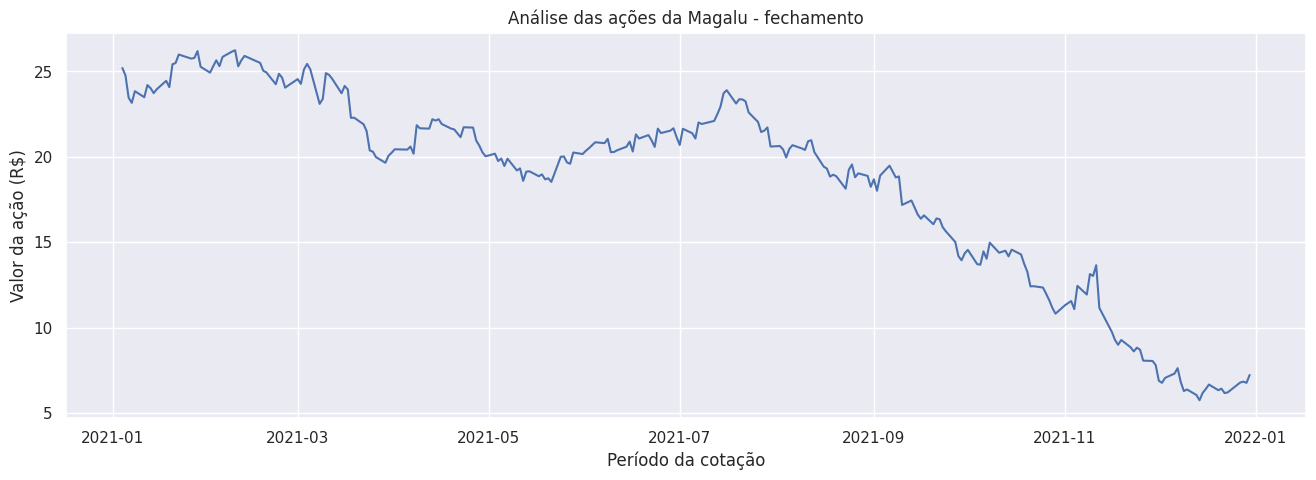

In [57]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(16,5))

plt.title('Análise das ações da Magalu - fechamento')

plt.plot(dados.index, dados['Fechamento']);

plt.xlabel('Período da cotação')

plt.ylabel('Valor da ação (R$)')